In [1]:
from aicsimageio import AICSImage
from tifffile import imsave
from pathlib import Path
import numpy as np
from skimage.filters import threshold_otsu
from skimage.morphology import ball, binary_closing, remove_small_objects, dilation, erosion, disk
from aicssegmentation.core.pre_processing_utils import  intensity_normalization, edge_preserving_smoothing_3d
from aicssegmentation.core.vessel import vesselness3D
from aicssegmentation.core.seg_dot import dot_2d
from aicssegmentation.core.utils import topology_preserving_thinning, hole_filling
import matplotlib.pyplot as plt
from itkwidgets import view   
from aicssegmentation.core.visual import seg_fluo_side_by_side,  single_fluorescent_view, segmentation_quick_view
plt.rcParams["figure.figsize"] = [16, 12]
from aicssegmentation.core.MO_threshold import MO
import warnings
warnings.filterwarnings('ignore')

<h3> 50ms Images <h3>

In [71]:
# 50ms images
golgi_raw_50imgs = ["//allen/aics/assay-dev/users/Sandi/aics-segmentation/lookup_table_demo/golgi-50ms-imgs/raw/5500000635_EE_1-01_AcquisitionBlock7_pt7_Scene-11_aligned.ome.tiff"]
                    #"//allen/aics/assay-dev/users/Sandi/aics-segmentation/lookup_table_demo/golgi-50ms-imgs/raw/5500000639_EE_1-01_AcquisitionBlock7_pt7_Scene-2_aligned.ome.tiff"]
                    #"//allen/aics/assay-dev/users/Sandi/aics-segmentation/lookup_table_demo/golgi-50ms-imgs/raw/5500000639_EE_1-01_AcquisitionBlock7_pt7_Scene-4_aligned.ome.tiff"]

golgi_seg_50imgs = ["C:/Users/sandra.oluoch/Desktop/slurm-down/golgi-50ms-ex2v5.1.tiff"]
                    #"C:/Users/sandra.oluoch/Desktop/slurm-down/golgi-50ms-ex6v5.tiff"]
                    #"C:/Users/sandra.oluoch/Desktop/slurm-down/golgi-50ms-ex7v5.tiff"]

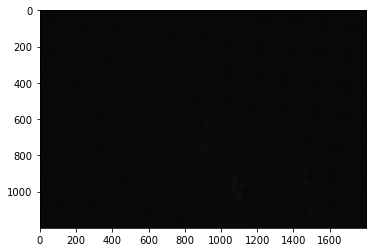

In [72]:
for filename in golgi_raw_50imgs:
    # reading file 
    IMG = AICSImage(filename).data.squeeze()
    # max image projection
    raw_fov_mip = IMG.max(axis=0)

    # view FOV
    fig, ax = plt.subplots(1,1, figsize=(6,4))
    ax.imshow(raw_fov_mip, cmap='gray')
    ax.set_aspect('equal')
    imsave('maxproj-raw-50ms-ex2.tiff', raw_fov_mip)

Failed to parse XML for the provided file. Error: not well-formed (invalid token): line 1, column 0


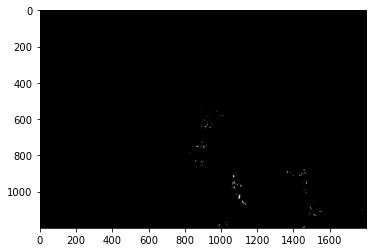

In [73]:
for filename in golgi_seg_50imgs:
    # reading file 
    IMG = AICSImage(filename).data.squeeze()
    # max image projection
    seg_fov_mip = IMG.max(axis=0)

    # view FOV
    fig, ax = plt.subplots(1,1, figsize=(6,4))
    ax.imshow(seg_fov_mip, cmap='gray')
    ax.set_aspect('equal')
    imsave('maxproj-seg-50ms-ex2.tiff', seg_fov_mip)

<h3> 200 Images <h3>

In [91]:
golgi_raw_200imgs = [#"//allen/aics/assay-dev/users/Sandi/aics-segmentation/lookup_table_demo/golgi-200ms-imgs/raw/5500000635_EE_1-01_AcquisitionBlock7_pt7_Scene-11_aligned.ome.tiff"]
                    #"//allen/aics/assay-dev/users/Sandi/aics-segmentation/lookup_table_demo/golgi-200ms-imgs/raw/5500000639_EE_1-01_AcquisitionBlock7_pt7_Scene-2_aligned.ome.tiff"]
                    "//allen/aics/assay-dev/users/Sandi/aics-segmentation/lookup_table_demo/golgi-200ms-imgs/raw/5500000639_EE_1-01_AcquisitionBlock7_pt7_Scene-4_aligned.ome.tiff"]

golgi_seg_200imgs = [#"C:/Users/sandra.oluoch/Desktop/slurm-down/golgi-200ms-ex2v5.tiff"]
                    #"C:/Users/sandra.oluoch/Desktop/slurm-down/golgi-200ms-ex6v5.tiff"]
                    "C:/Users/sandra.oluoch/Desktop/slurm-down/golgi-200ms-ex7v5.tiff"]

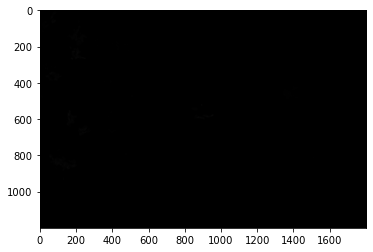

In [92]:
for filename in golgi_raw_200imgs:
    # reading file 
    IMG = AICSImage(filename).data.squeeze()
    # max image projection
    raw_fov_mip = IMG.max(axis=0)

    # view FOV
    fig, ax = plt.subplots(1,1, figsize=(6,4))
    ax.imshow(raw_fov_mip, cmap='gray')
    ax.set_aspect('equal')
    imsave('maxproj-raw-200ms-ex7.tiff', raw_fov_mip)

Failed to parse XML for the provided file. Error: not well-formed (invalid token): line 1, column 0


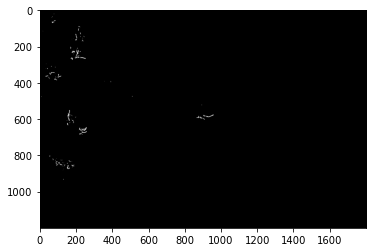

In [93]:
for filename in golgi_seg_200imgs:
    # reading file 
    IMG = AICSImage(filename).data.squeeze()
    # max image projection
    seg_fov_mip = IMG.max(axis=0)

    # view FOV
    fig, ax = plt.subplots(1,1, figsize=(6,4))
    ax.imshow(seg_fov_mip, cmap='gray')
    ax.set_aspect('equal')
    imsave('maxproj-seg-200ms-ex7.tiff', seg_fov_mip)

<h3> TF-200ms Images <h3>

In [88]:
golgi_raw_tf200imgs = [#"//allen/aics/assay-dev/users/Sandi/aics-segmentation/lookup_table_demo/golgi-tf200ms-imgs/raw/5500000635_EE_1-01_AcquisitionBlock7_pt7_Scene-11_aligned.ome.tiff"]
                      #"//allen/aics/assay-dev/users/Sandi/aics-segmentation/lookup_table_demo/golgi-tf200ms-imgs/raw/5500000639_EE_1-01_AcquisitionBlock7_pt7_Scene-2_aligned.ome.tiff",
                      "//allen/aics/assay-dev/users/Sandi/aics-segmentation/lookup_table_demo/golgi-tf200ms-imgs/raw/5500000639_EE_1-01_AcquisitionBlock7_pt7_Scene-4_aligned.ome.tiff"]

golgi_seg_tf200imgs = [#"C:/Users/sandra.oluoch/Desktop/slurm-down/golgi-tf200ms-ex2v5.tiff"]
                      #"C:/Users/sandra.oluoch/Desktop/slurm-down/golgi-tf200ms-ex6v5.tiff",
                      "C:/Users/sandra.oluoch/Desktop/slurm-down/golgi-tf200ms-ex7v5.tiff"]

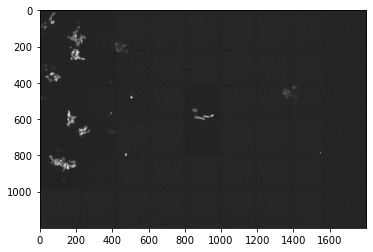

In [89]:
for filename in golgi_raw_tf200imgs:
    # reading file 
    IMG = AICSImage(filename).data.squeeze()
    # max image projection
    raw_fov_mip = IMG.max(axis=0)

    # view FOV
    fig, ax = plt.subplots(1,1, figsize=(6,4))
    ax.imshow(raw_fov_mip, cmap='gray')
    ax.set_aspect('equal')
    imsave('maxproj-raw-tf200ms-ex7.tiff', raw_fov_mip)

Failed to parse XML for the provided file. Error: not well-formed (invalid token): line 1, column 0


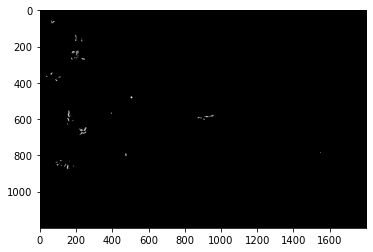

In [90]:
for filename in golgi_seg_tf200imgs:
    # reading file 
    IMG = AICSImage(filename).data.squeeze()
    # max image projection
    seg_fov_mip = IMG.max(axis=0)

    # view FOV
    fig, ax = plt.subplots(1,1, figsize=(6,4))
    ax.imshow(seg_fov_mip, cmap='gray')
    ax.set_aspect('equal')
    imsave('maxproj-seg-tf200ms-ex7.tiff', seg_fov_mip)

<h3> Example 3 50ms and 200ms Projections <h3>

Failed to parse XML for the provided file. Error: not well-formed (invalid token): line 1, column 0


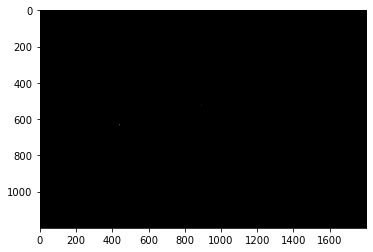

In [2]:
# Example 3 (50ms and 200ms)
ex3_50ms = ["C:/Users/sandra.oluoch/Desktop/slurm-down/golgi-50ms-ex3v9.2.tiff"]
ex3_200ms = ["C:/Users/sandra.oluoch/Desktop/slurm-down/golgi-200ms-ex3v9TEST.tiff"]
ex3_tf200ms = ["C:/Users/sandra.oluoch/Desktop/slurm-down/golgi-tf200ms-ex3v9.2.tiff"]

ex6_50ms = ["C:/Users/sandra.oluoch/Desktop/slurm-down/golgi-50ms-ex6v9TEST.tiff"]

for filename in ex6_50ms:
    # reading file 
    IMG = AICSImage(filename).data.squeeze()
    # max image projection/
    seg_fov_mip = IMG.max(axis=0)

    # view FOV
    fig, ax = plt.subplots(1,1, figsize=(6,4))
    ax.imshow(seg_fov_mip, cmap='gray')
    ax.set_aspect('equal')
    imsave('maxproj-seg-50ms-ex6v9.2.tiff', seg_fov_mip)

Failed to parse XML for the provided file. Error: not well-formed (invalid token): line 1, column 0


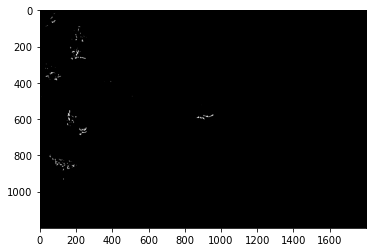

In [69]:
ex6_200ms = ["C:/Users/sandra.oluoch/Desktop/slurm-down/golgi-200ms-ex7v9.3.tiff"]

for filename in ex6_200ms:
    # reading file 
    IMG = AICSImage(filename).data.squeeze()
    # max image projection
    seg_fov_mip = IMG.max(axis=0)

    # view FOV
    fig, ax = plt.subplots(1,1, figsize=(6,4))
    ax.imshow(seg_fov_mip, cmap='gray')
    ax.set_aspect('equal')
    imsave('maxproj-seg-200ms-ex7v9.3.tiff', seg_fov_mip)

Failed to parse XML for the provided file. Error: not well-formed (invalid token): line 1, column 0


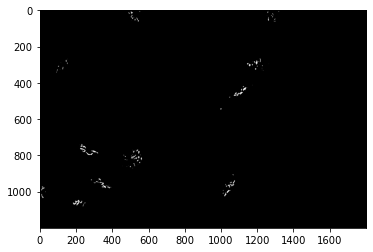

In [51]:
for filename in ex3_tf200ms:
    # reading file 
    IMG = AICSImage(filename).data.squeeze()
    # max image projection
    seg_fov_mip = IMG.max(axis=0)

    # view FOV
    fig, ax = plt.subplots(1,1, figsize=(6,4))
    ax.imshow(seg_fov_mip, cmap='gray')
    ax.set_aspect('equal')
    imsave('maxproj-seg-tf200ms-ex3v9.2.tiff', seg_fov_mip)

<h3> For F1-Score Calculations <h3>

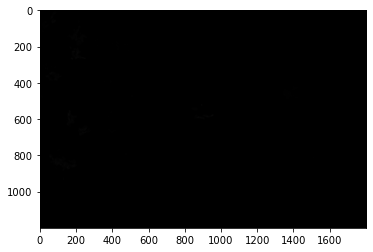

In [64]:
# for f1-score calculations

f1_seg = ["//allen/aics/assay-dev/users/Sandi/aics-segmentation/lookup_table_demo/golgi-200ms-imgs/raw/5500000639_EE_1-01_AcquisitionBlock7_pt7_Scene-4_aligned.ome.tiff"]

for filename in f1_seg:
    # reading file 
    IMG = AICSImage(filename).data.squeeze()
    # max image projection
    seg_fov_mip = IMG.max(axis=0)

    # view FOV
    fig, ax = plt.subplots(1,1, figsize=(6,4))
    ax.imshow(seg_fov_mip, cmap='gray')
    ax.set_aspect('equal')
    imsave('maxproj-raw-200ms-ex7v9.2.tiff', seg_fov_mip)